In [1]:
# Use the Azure Machine Learning data collector to log various metrics
from azureml.logging import get_azureml_logger
logger = get_azureml_logger()

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Use Azure Machine Learning history magic to control history collection
# History is off by default, options are "on", "off", or "show"
# %azureml history on

In [4]:
X_raw = pd.read_csv('data/featureVectors_t0.csv')
X = X_raw.drop(['ct_planid','ct_valuedate'], axis=1)

In [5]:
kmeans = KMeans(n_clusters=50, random_state=0).fit(X)
kmeans.cluster_centers_
kmeans.cluster_centers_[12,:]

array([  3.80395097e+09,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,

In [6]:
np.set_printoptions(threshold=np.inf)
print(kmeans.labels_)

[35  0 46  0 47 10 29 32  0 35 27 35 27  6 27 35  0 35 10 14 29 21  0 47 21
 16 33  0 40 40 35 14 39 35  0 14 35 47 40 25 35  0 29 46 43 46 37 35 46 15
 47 46 40 35  6 35 35 44 14  0  0 40  0 46 35 21 47 21 35 29 13 42 29 39 35
 35 32  0 47 14 29 14 36 31 29 45  0 18 11  0 35 46 14 29 32 29 39 40 39 14
 35 11 47  0 35 47 35 29 29 10 47  0 39 35 37  0 25 48 47 35 10 35 29  0 40
 47 35 29 40 34 14 32 35 39 35 35 32 46 35 40 35  0 35 24 27 39  3 47 29  4
 14 21  0 32 35 35 15  0 47 25  6 37 47 35 35 31  0 35 38 29 35 14 10 35 35
 42 29 10 10 35  0 35 35 26 27 29 39 39 10 35  0 35 32 18 27 10 47 47 10 33
 39 14 46 14 39 47 35 15  0  0  0  6 39 40 29 38 35 18 46 35 14 29 21  0 10
 10 16  0 45 35 27 46 47 31 35 29 30 37  0 37 35 35 35  0  0 27 14  0 42  0
 35  0 35 29 35  6 35 21  0 10 37 37 26 14  9 35 47 47 10 10  0  0  0 47  0
 40  0 14  0 27 14 27 48  0 35 47 35 21 43 35 35 39 21 47 47 39  6  5 35  0
  5 47 35 14 35  0 47  0 39 35 46  5 32  6 33 37 14 35 35  6 35 32 46 35 34
 10 32 14  3

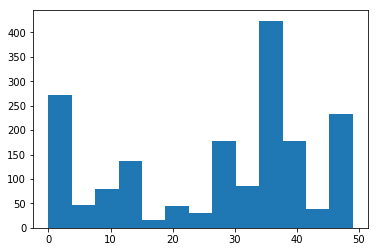

In [7]:
plt.hist(kmeans.labels_, bins='auto')
plt.show()

In [8]:
display(kmeans.cluster_centers_.shape)
display(kmeans.labels_.shape)
display(X_raw.shape)

(50, 182)

(1761,)

(1761, 184)

In [9]:
planIds = X_raw['ct_planid'].as_matrix()
display(planIds.shape)


(1761,)

In [10]:
# read in data
cluster_assignments_path = 'data/cluster_assignments.npy'
cluster_assignments = np.load(cluster_assignments_path)

t0_data_path = 'data/featureVectors_t0.csv'
t0 = pd.read_csv(t0_data_path)

t1_data_path = 'data/featureVectors.csv'
t1 = pd.read_csv(t1_data_path)

In [28]:
planID_cluster = np.array(list(zip(planIds,kmeans.labels_)))
planID_cluster 

array([['000C0CB1-6865-44E4-B7ED-6B0DF402F8D7', '35'],
       ['000EB31E-B7AD-48E5-BC03-7A04E1383B33', '0'],
       ['00161525-0DAB-486D-8E1A-0B4C996A92FA', '46'],
       ['003CFB64-7574-4D4C-8742-BF2414B24E2D', '0'],
       ['00612CE1-A0D1-4B1F-BE97-44761B7764EA', '47'],
       ['006B0FFD-4B66-4135-8BB1-9A4D32304BBB', '10'],
       ['0081E111-9594-48DF-8CD9-242ABE042F68', '29'],
       ['00B0A9ED-C5B4-41CB-A338-D55BF4DBA4BF', '32'],
       ['00D0F0C5-81A7-4CF9-A75E-D5EFD453C763', '0'],
       ['00E09530-C3D2-41EB-A43F-97258EEA54DC', '35'],
       ['011859FB-4715-4BED-91B7-D25A1A807D16', '27'],
       ['0134AF96-C71A-4650-BBD6-C352E8522668', '35'],
       ['014CFDF2-F52E-4C85-9C15-95C5CD2586EC', '27'],
       ['01871E85-E8B1-4DC0-B998-22375FA6DCFB', '6'],
       ['01948953-99C6-4626-A6E2-8D7A73A41542', '27'],
       ['01A78096-FE42-437B-AC84-9E4F4DFA1ECA', '35'],
       ['01E2AB57-150D-433D-93DF-EF38B6B72263', '0'],
       ['02018310-FBA8-488A-A066-E88A5FB0C59E', '35'],
       ['02051F

In [27]:
# create dictionary with centers as keys and plan ids as values
clusterMembers = {}
#for tuple in planID_cluster:
for tuple in planID_cluster:
    key = tuple[1]
    value = tuple[0]
    if key in planID_cluster:
        clusterMembers[key].append(value)
    else:
        clusterMembers[key] = [value]
display(clusterMembers)

{}

In [26]:
t1 = pd.read_csv('data/featureVectors_t1.csv')
#t0 = t0[['ct_planid','ct_value']]
t1_dict = dict(zip(t1['ct_planid'],t1['ct_value']))
#display(t0_dict)
#t1 = X_raw[['ct_planid','ct_value']]
t0_dict = dict(zip(X_raw['ct_planid'],X_raw['ct_value']))
display(t0_dict)

{'457AF758-519E-4275-B37B-17659915C63F': 3679025.7599999998,
 '061416B8-20A4-4A62-B7D6-4552ACE41CFC': 640158.38,
 '69618C9E-4CCC-43E9-BA00-5CC2ADE02B30': 16397547.16,
 'E44F562C-EAD8-4F53-A967-5DC073063555': 12634666.449999999,
 '00E09530-C3D2-41EB-A43F-97258EEA54DC': 2722742.7999999998,
 '83B364B1-C670-446E-8391-5BEE4DDF15FE': 14376616.42,
 'C67B9FD1-5901-4A4E-A094-CCD31F75D7F2': 1181287.1499999999,
 '5B53AE3A-B3C9-4C82-BBA4-498FFA7F01EE': 710028.47999999998,
 'E79DF040-F40A-46F7-A227-F79221EB9B42': 313545890.79000002,
 'F0329D5A-50AF-4C2E-BE28-4E7E3340C024': 13254469.039999999,
 '1EBCFE19-4FA0-44A1-A39E-02BE21A377F1': 763173868.36000001,
 '879B686E-6774-4E9A-8B8D-65BC2318C559': 1085534547.8800001,
 '2BDC9F56-9637-4CDB-AD51-FC544163E99E': 27091370.440000001,
 '33800AD5-C9D4-4D09-93C0-850DD2AD12C0': 3440660.6499999999,
 '5471AAFE-5AD9-492B-910E-C426B0CB9879': 1675050.1799999999,
 '9F9D8B1F-5DA2-47CE-8E83-8F3C75FC894B': 42930270.969999999,
 '189F6757-F0DB-40CE-B754-6584439647F7': 130358

In [19]:
delta = pd.read_csv('data/dictionary.csv')
delta_dict = dict(zip(delta['ct_planid'],delta['pct_chng']))
delta_dict

{'457AF758-519E-4275-B37B-17659915C63F': 0.1114,
 '061416B8-20A4-4A62-B7D6-4552ACE41CFC': -0.083099999999999993,
 '879B686E-6774-4E9A-8B8D-65BC2318C559': 0.1182,
 'E44F562C-EAD8-4F53-A967-5DC073063555': 0.2278,
 '83B364B1-C670-446E-8391-5BEE4DDF15FE': 0.63429999999999997,
 '5B53AE3A-B3C9-4C82-BBA4-498FFA7F01EE': 0.1174,
 'E79DF040-F40A-46F7-A227-F79221EB9B42': 0.056399999999999999,
 'F0329D5A-50AF-4C2E-BE28-4E7E3340C024': 0.0,
 '1EBCFE19-4FA0-44A1-A39E-02BE21A377F1': 0.36249999999999999,
 '2BDC9F56-9637-4CDB-AD51-FC544163E99E': 0.89249999999999996,
 '33800AD5-C9D4-4D09-93C0-850DD2AD12C0': 0.33139999999999997,
 '189F6757-F0DB-40CE-B754-6584439647F7': 0.1216,
 '1EBF5003-EAF9-48D0-848F-4F4886DB2763': 0.2344,
 'F4932FAE-8638-4EBE-A02B-E2DEC48681FC': -0.19409999999999999,
 '425FA12C-2896-4522-BB28-AAD5004187CD': 0.0,
 '488BAE42-97DA-406D-90CB-72AF963BBB39': 0.83530000000000004,
 '1CD6FB83-2EA4-4030-86F9-B8EF1C69CDBB': 0.18759999999999999,
 'F248A1B2-C026-478A-8B56-A2BF6AC0D979': 0.0,
 '8F04

In [20]:
def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    if(median_absolute_deviation_y == 0):
        median_absolute_deviation_y == 0.0000001
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

In [23]:
for key, value in planID_cluster.items():
    print(key, value)
    deltaList = []
    planIdList = []
    deltaPlanList = []
    for id in value:
        if (id in t0_dict and id in t1_dict):
            t0_val = t0_dict[id]
            t1_val = t1_dict[id]
            if (t0_val != 0):
                delta = (t1_val - t0_val)/t0_val
                #print(id,delta)
                #deltaList.append([delta,id])
                deltaList.append(delta)
                planIdList.append(id)

    outliers = outliers_modified_z_score(deltaList)
    median = np.median(deltaList)
    stddev = np.std(deltaList)
    for outlier in outliers[0]:
        #print(outlier)
        outlierId = planIdList[outlier]
        deltaVal = deltaList[outlier]
        print(outlierId, deltaVal, median, stddev)
    #print(outliers)